In [3]:
import numpy as np

In [4]:
import pandas as pd

In [5]:
leaf = np.loadtxt('./leaf.csv', delimiter = ',')

In [6]:
import matplotlib.pyplot as plt

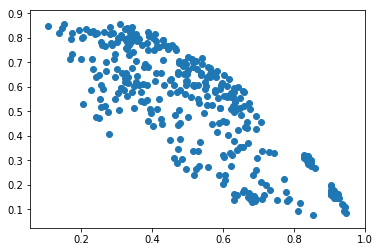

In [7]:
# import coordinates
fig, ax = plt.subplots()
# populate the plot with the the observations from columns 4 and 7

ax.scatter(leaf[:,4], leaf[:,7])

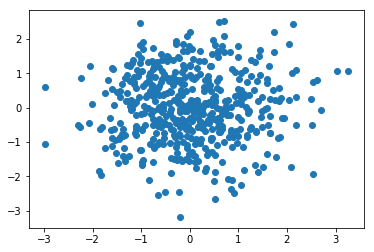

In [8]:
rndn = np.random.randn(500,2)
fig, ax = plt.subplots()
ax.scatter(rndn[:,0],rndn[:,1])
plt.show()

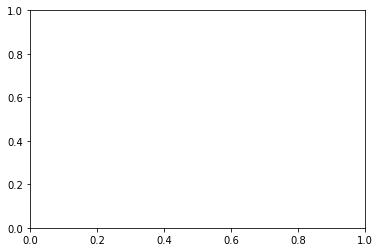

In [9]:
url = "http://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
df = pd.read_csv(url, names = ['sepal length', 'sepal width', 'petal length', 'petal width', 'target'])
fig, ax = plt.subplots()


In [35]:
df

,sepal length,sepal width,petal length,petal width,target
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,0.2,Iris-setosa
8,4.4,2.9,1.4,0.2,Iris-setosa
9,4.9,3.1,1.5,0.1,Iris-setosa


In [25]:
###Preprocessing

In [10]:
import sklearn

In [11]:
# structure the dataset with a dataframe: array with names of columns, can drop, select information
features = ['sepal length', 'sepal width', 'petal length', 'petal width']
# convert dataframe into a numpy array: numpy array - without the names of columns, input for ML algorithms; loc = access by labels
x = df.loc[:, features].values
y = df.loc[:, ['target']].values
# resize the data with a standard scaler to remove the unit effect (e.g. values in meters or cm)
from sklearn.preprocessing import StandardScaler
x = StandardScaler().fit_transform(x)

In [12]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
# we create a new data frame with principal components
principalDF = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2'])

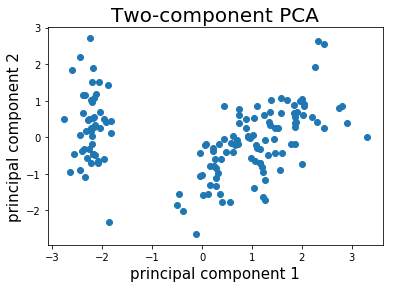

In [14]:
fig, ax = plt.subplots()
ax.scatter(principalComponents[:,0], principalComponents[:,1])
ax.set_xlabel('principal component 1', fontsize = 15)
ax.set_ylabel('principal component 2', fontsize = 15)
ax.set_title('Two-component PCA', fontsize = 20)
plt.show()

In [15]:
# concatenate previously created PrincipalDF with "target" DF
finalDF = pd.concat([principalDF, df[['target']]], axis = 1)
targets = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']

Text(0.5, 1.0, 'Two-component PCA')

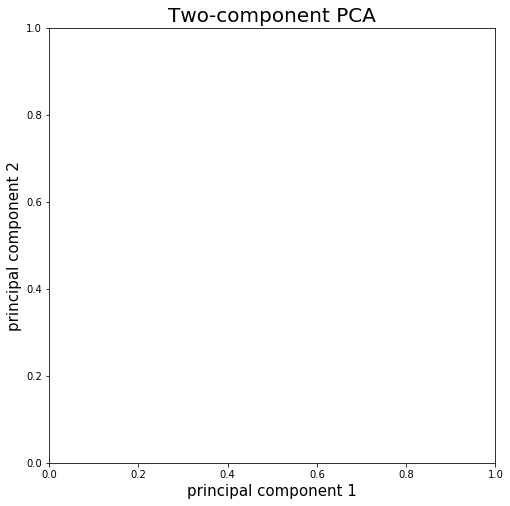

In [16]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1)
ax.set_xlabel('principal component 1', fontsize = 15)
ax.set_ylabel('principal component 2', fontsize = 15)
ax.set_title('Two-component PCA', fontsize = 20)

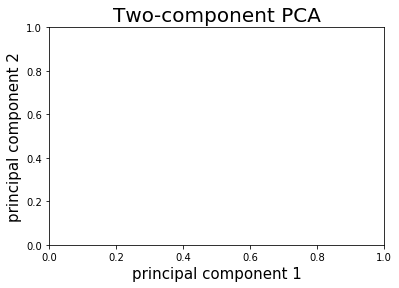

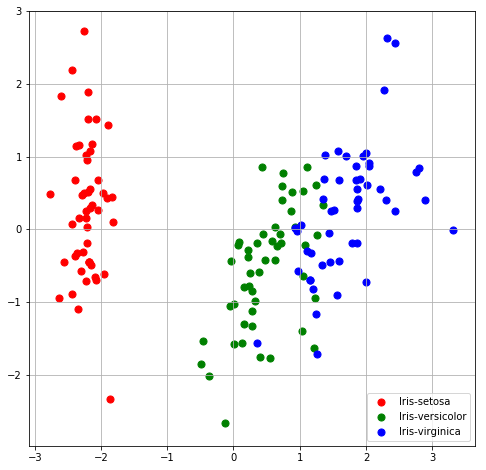

In [17]:
# initialize the space for plots
fig, ax = plt.subplots()
ax.set_xlabel('principal component 1', fontsize = 15)
ax.set_ylabel('principal component 2', fontsize = 15)
ax.set_title('Two-component PCA', fontsize = 20)
# set the size of the plot, the colors, and the scale (1,1,1)
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1)
colors = ['r', 'g', 'b']
for target, color in zip(targets, colors):
    indicesToKeep = finalDF['target'] == target
    ax.scatter(finalDF.loc[indicesToKeep, 'principal component 1'], finalDF.loc[indicesToKeep, 'principal component 2'], c = color, s = 50)
# add the legend and the grid display the plot
ax.legend(targets)
ax.grid()
plt.show()

In [1]:
list1 = [el1, el2, el3]
list2 = [e11, el12, el13]
zip(list1, list2) # map list1 onto list2

NameError: name 'el1' is not defined